# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [202]:
# Libraries

%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

# Challenge 1

#### Read the `employees` dataset
Save your data in a variable called `employees`.

In [203]:

# your code here
data = pd.read_csv("./Employee.csv")
data

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [204]:
df = data

#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [205]:
# Method 1
# your code here

mean_no_pivot = data.groupby(by='Department')['Salary'].mean()
mean_no_pivot.to_frame()

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [206]:
# Method 2
# your code here

## ERROR : ValueError: Index contains duplicate entries, cannot reshape
# mean_pivot = data.pivot(index="Department", columns="Salary")
## INSTRUCTION COMPLETE DU COURS
# mean_pivot = data[["Department", "Salary"]].pivot_table(index='Department', columns='Salary', values='Salary', aggfunc=[len, np.mean])


mean_pivot = data[["Department", "Salary"]].pivot_table(index='Department', values="Salary", aggfunc=np.mean)
mean_pivot

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [207]:
# your code here
mean_pivot_2 = data[["Department", "Salary", "Title"]].pivot_table(index=['Department', 'Title'], values='Salary', aggfunc=[np.mean])
mean_pivot_2

mean
                     Salary
Department Title           
HR         VP          70.0
           analyst     32.5
IT         VP          70.0
           analyst     32.5
           associate   60.0
Sales      associate   55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [208]:
#FOR REFERENCE ONLY, PLEASE IGNORE
mean_pivot_3x = data[["Department", "Salary", "Title", "Years"]].pivot_table(index=['Department', 'Title'], values=["Salary", "Years"], aggfunc=[np.mean])
mean_pivot_3x

mean      
                     Salary Years
Department Title                 
HR         VP          70.0   8.0
           analyst     32.5   3.0
IT         VP          70.0   8.0
           analyst     32.5   1.5
           associate   60.0   7.0
Sales      associate   55.0   2.5

In [209]:
# your code here
mean_pivot_3 = data[["Department", "Salary", "Title", "Years"]].pivot_table(index=['Department', 'Title'], values=["Salary", "Years"], aggfunc={"Salary":np.mean,"Years":np.sum})
mean_pivot_3


Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [210]:
#FOR REFERENCE ONLY, PLEASE IGNORE
mean_pivot_4x = data[["Department", "Salary", "Title", "Years"]].pivot_table(index=['Department', 'Title'], values=["Salary", "Years"], aggfunc={"Salary":np.mean,"Title":'count'})
mean_pivot_4x

Salary  Title
Department Title                   
HR         VP           70.0      1
           analyst      32.5      2
IT         VP           70.0      1
           analyst      32.5      2
           associate    60.0      1
Sales      associate    55.0      2

In [211]:
#FOR REFERENCE ONLY, PLEASE IGNORE
mean_pivot_4y = data[["Department", "Salary", "Title", "Years"]].pivot_table(index=['Department', 'Title'], values=["Salary", "Years"], aggfunc={len, np.mean})
mean_pivot_4y.rename(columns={"Title": "Employees at Position"}, inplace=True)
mean_pivot_4y

Salary       Years     
                        len  mean   len mean
Department Title                            
HR         VP             1  70.0     1  8.0
           analyst        2  32.5     2  3.0
IT         VP             1  70.0     1  8.0
           analyst        2  32.5     2  1.5
           associate      1  60.0     1  7.0
Sales      associate      2  55.0     2  2.5

In [212]:
mean_pivot_4 = data[["Department", "Salary", "Title", "Years"]].pivot_table(index=['Department', 'Title'], values=["Salary", "Years"], aggfunc={"Salary":np.mean,"Title":'count'})
mean_pivot_4.rename(columns={"Title": "Employees at Position"}, inplace=True)
mean_pivot_4

Salary  Employees at Position
Department Title                                   
HR         VP           70.0                      1
           analyst      32.5                      2
IT         VP           70.0                      1
           analyst      32.5                      2
           associate    60.0                      1
Sales      associate    55.0                      2

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [213]:
# your code here
# pivot_5 = df[["Department", "Salary", "Title", "Years"]].pivot_table(index=['Department', 'Title'], values=["Salary"], aggfunc=[np.mean, np.median, np.min, np.max])
# pivot_5 = df.rename(columns={"Title": "Employees at Position"}, inplace=True)

pivot_5

Number of Employees  Salary Mean  Salary Median  \
Department Title                                                        
HR         VP                           1         70.0           70.0   
           analyst                      2         32.5           32.5   
IT         VP                           1         70.0           70.0   
           analyst                      2         32.5           32.5   
           associate                    1         60.0           60.0   
Sales      associate                    2         55.0           55.0   

                      Min. Salary  Max. Salary     Stdev  
Department Title                                          
HR         VP                  70           70  0.000000  
           analyst             30           35  3.535534  
IT         VP                  70           70  0.000000  
           analyst             30           35  3.535534  
           associate           60           60  0.000000  
Sales      associate           55           55  0.000000

In [214]:
pivot_5 = data.pivot_table(index=['Department', 'Title'], values="Salary", aggfunc=[len, np.mean, np.median, np.min, np.max, np.std])
# pivot_5.rename(columns={"Title": "Employees at Position"}, level=1, inplace=True)
pivot_5.columns = ["Number of Employees", "Salary Mean", "Salary Median", "Min. Salary", "Max. Salary", "Stdev"]
pivot_5


Number of Employees  Salary Mean  Salary Median  \
Department Title                                                        
HR         VP                           1         70.0           70.0   
           analyst                      2         32.5           32.5   
IT         VP                           1         70.0           70.0   
           analyst                      2         32.5           32.5   
           associate                    1         60.0           60.0   
Sales      associate                    2         55.0           55.0   

                      Min. Salary  Max. Salary     Stdev  
Department Title                                          
HR         VP                  70           70       NaN  
           analyst             30           35  3.535534  
IT         VP                  70           70       NaN  
           analyst             30           35  3.535534  
           associate           60           60       NaN  
Sales      associate           55           55  0.000000

In [215]:
pivot_5.columns

Index(['Number of Employees', 'Salary Mean', 'Salary Median', 'Min. Salary',
       'Max. Salary', 'Stdev'],
      dtype='object')

In [216]:
"""
your commments here

VPs are paid the most.
Associates are paid more than analysts.

Sales associates are both paid the same, which is contrary to other departments : every other position with 1+ employee*
has a difference in the wage they give to their workers.

Obviously, departments position with onlt 1 person, have a std equal to 0. Which is here missing as it can't be computed.
"""

"\nyour commments here\n\nVPs are paid the most.\nAssociates are paid more than analysts.\n\nSales associates are both paid the same, which is contrary to other departments : every other position with 1+ employee*\nhas a difference in the wage they give to their workers.\n\nObviously, departments position with onlt 1 person, have a std equal to 0. Which is here missing as it can't be computed.\n"

#### Based on your comments, fill the missing values with an appropriate value.

In [217]:
# your code here
pivot_5 = pivot_5.fillna(0)
pivot_5

Number of Employees  Salary Mean  Salary Median  \
Department Title                                                        
HR         VP                           1         70.0           70.0   
           analyst                      2         32.5           32.5   
IT         VP                           1         70.0           70.0   
           analyst                      2         32.5           32.5   
           associate                    1         60.0           60.0   
Sales      associate                    2         55.0           55.0   

                      Min. Salary  Max. Salary     Stdev  
Department Title                                          
HR         VP                  70           70  0.000000  
           analyst             30           35  3.535534  
IT         VP                  70           70  0.000000  
           analyst             30           35  3.535534  
           associate           60           60  0.000000  
Sales      associate           55           55  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [218]:
# your code here
pivot_6 = data.pivot_table(index=["Department"], values="Salary", aggfunc=[len, sum])
pivot_6.columns = ["Number of Employees", "Salary Total for Department"]
pivot_6

,Number of Employees,Salary Total for Department
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [219]:
data

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [220]:
# your code here
pivot_7 = data.pivot_table(index=["Department", "Title"], values=["Years", "Salary"], aggfunc={'Salary':'mean','Years':'sum'})
pivot_7

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [221]:
# your code here

# Challenge 2

#### Read the `fitbit` dataset 
Save your data in a variable called `fitbit`.

In [222]:
# your code here
data = pd.read_csv("./Fitbit.csv")
data

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,03-05-2016,3796,18588,14.13,16,599.000,275,49,79,236,377,33,18,410
363,04-05-2016,3525,16382,12.39,16,684.000,333,10,55,2075,406,21,8,427
364,05-05-2016,3649,21913,16.40,19,701.000,287,29,90,2249,280,35,15,315
365,06-05-2016,3539,19023,14.79,15,575.000,298,8,85,2112,370,42,22,412


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [223]:
types = data.dtypes
types

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [224]:
info = data.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

In [225]:
desc = data.describe()
desc

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [227]:
# your code here
correlation = data['Minutes Very Active'].corr(data['Steps'])
print("The Pearson correlation between 'Minutes Very Active' and 'Steps' is:", correlation)

Correlation between 'Minutes Very Active' and 'Steps' : 0.5714518481062609


#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [ ]:
import matplotlib.pyplot as plt

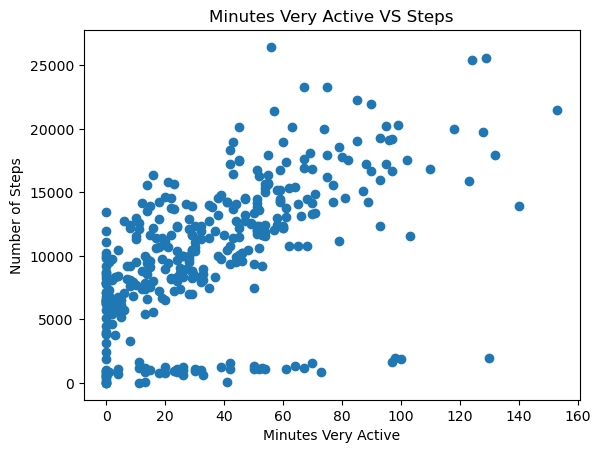

In [229]:
plt.scatter(data['Minutes Very Active'], (data['Steps']))
plt.title("Minutes Very Active VS Steps")
plt.xlabel("Minutes Very Active")
plt.ylabel("Number of Steps")
plt.show()

#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [232]:
"""
It seems there's a correlation between the two as we can clearly some kind of diagonal shape forming.
"""

"\nIt seems there's a correlation between the two as we can clearly some kind of diagonal shape forming.\n"

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [233]:
correlation = data["Minutes Sedentary"].corr(data["Steps"])
print("Correlation between 'Minutes Sedentary' and 'Steps' is :", correlation)

Correlation between 'Minutes Sedentary' and 'Steps' is : 0.07690608062990095


#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

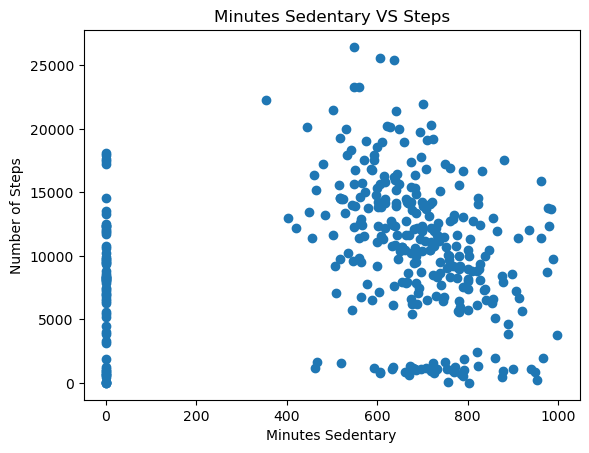

In [235]:
# your code here

plt.scatter(data["Minutes Sedentary"], (data["Steps"]))
plt.title("Minutes Sedentary VS Steps")
plt.xlabel("Minutes Sedentary")
plt.ylabel("Number of Steps")
plt.show()

In [236]:
"""
It seems there's no important correlation between Minutes Sedentary and the number of Steps. The data is pretty evenly distributed 
"""

"\nIt seems there's no important correlation between Minutes Sedentary and the number of Steps.\n"

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [ ]:
# your code here

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

In [ ]:
# your code here

In [ ]:
"""
your commments here
"""

'\nyour commments here\n'

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [ ]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [ ]:
# your code here

#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [ ]:
# your code here

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [ ]:
# your code here

#### Show visually the frequency distribution of the `time_grades` dataset.

In [ ]:
# your code here

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [ ]:
# your code here

In [ ]:
"""
your commments here
"""

'\nyour commments here\n'

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

In [ ]:
# your code here

In [ ]:
"""
your commments here
"""

'\nyour commments here\n'

#### Could you explain the difference between Pearson and Spearman correlations?

In [ ]:
"""
your commments here
"""

'\nyour commments here\n'